<a href="https://colab.research.google.com/github/Dharklite/data-science-projects/blob/main/car_pricing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔍 Step-by-Step Analysis of Car Sales Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car data.csv')  # Adjust path if needed
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### **Step 2: Basic Information and Cleaning**

In [ ]:
# Overview of the dataset
df.info()

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
Duplicates: 2


### **Step 3: Feature Engineering**

In [ ]:
# Create a new column for car age
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# Drop the original 'Year' column if no longer needed
df.drop('Year', axis=1, inplace=True)

# Reorder columns for clarity
df = df[['Car_Name', 'Car_Age', 'Selling_Price', 'Present_Price', 'Driven_kms',
         'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]

df.head()


,Car_Name,Car_Age,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,11,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,12,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,8,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,14,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,11,4.60,6.87,42450,Diesel,Dealer,Manual,0


### **Step 4: Exploratory Data Analysis (EDA)**

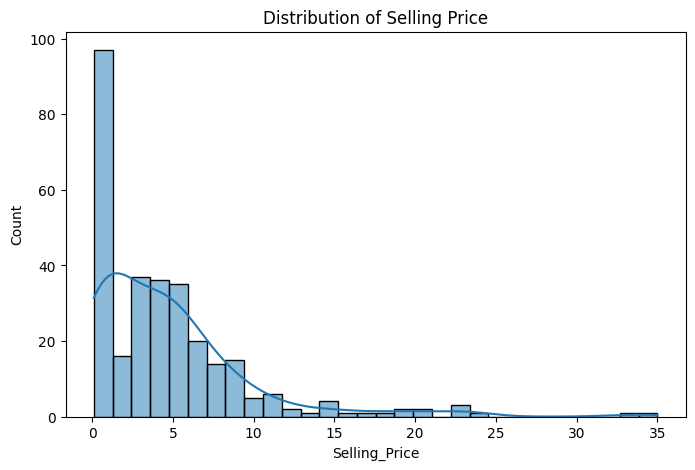

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.show()


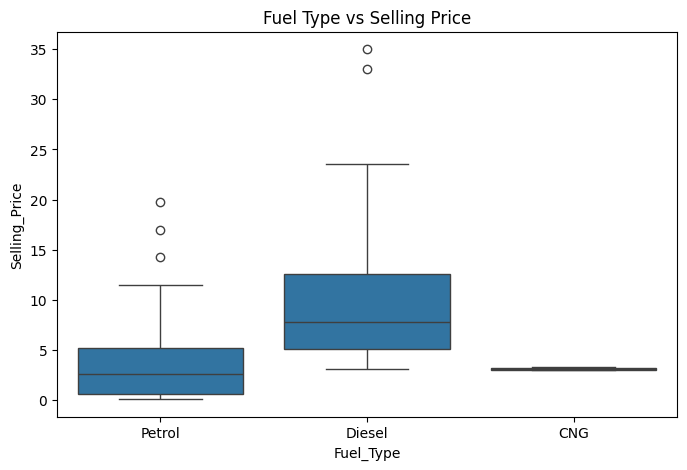

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Fuel Type vs Selling Price')
plt.show()


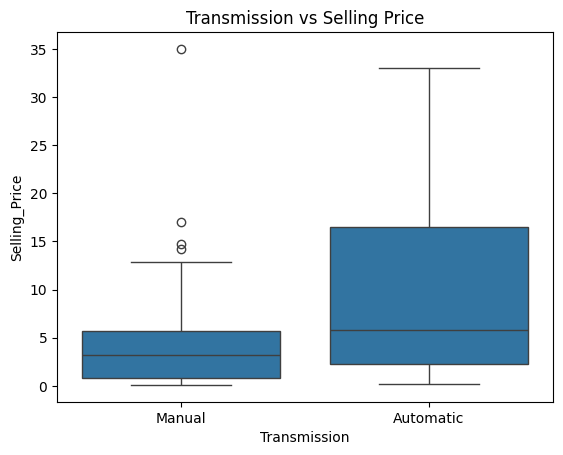

In [ ]:
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Transmission vs Selling Price')
plt.show()


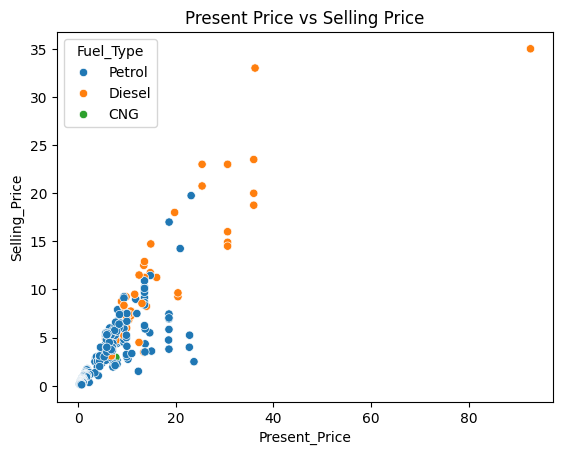

In [ ]:
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title('Present Price vs Selling Price')
plt.show()


### **Step 5: Correlation Analysis**

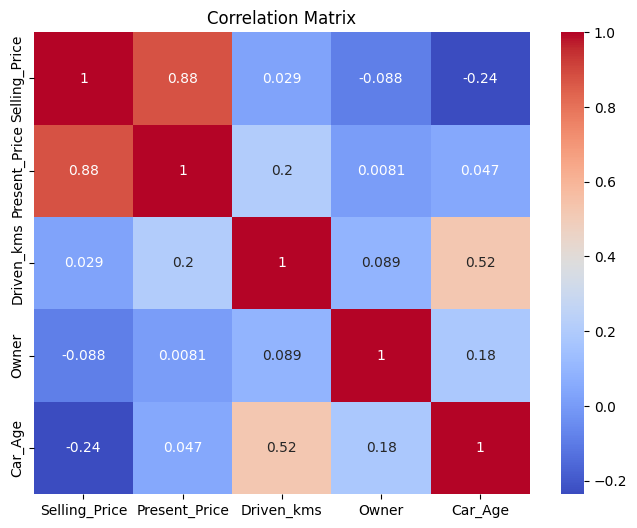

In [ ]:
# Only numerical features
corr_matrix = df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Age']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **Step 6: Summary of Insights**

In [ ]:
print("""
- Present_Price is highly correlated with Selling_Price.
- Older cars generally have lower resale value.
- Diesel vehicles may have different price trends than Petrol or CNG.
- Manual transmission is more common but Automatic may fetch a higher price.
""")



- Present_Price is highly correlated with Selling_Price.
- Older cars generally have lower resale value.
- Diesel vehicles may have different price trends than Petrol or CNG.
- Manual transmission is more common but Automatic may fetch a higher price.

